In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [4]:
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
#preprocessing

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.duplicated().sum()

0

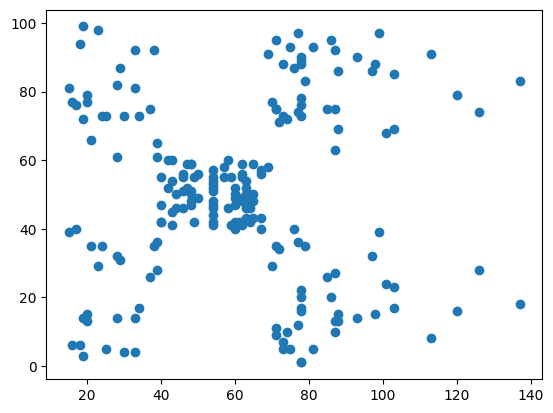

In [8]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [9]:
#using elbow method to decide the number of cluster to be formed
krange=range(1,9)
sse=[]
for k in krange:
  model1=KMeans(n_clusters=k)
  model1.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  sse.append(model1.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [10]:
sse

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25022.48500453035]

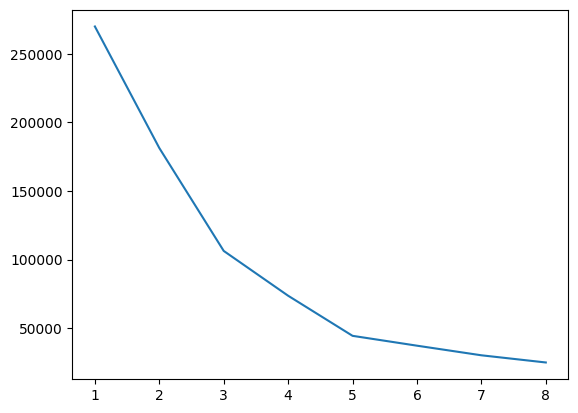

In [11]:
plt.plot(krange,sse)

In [12]:
#n_cluster=5

scaler=MinMaxScaler()
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)']=scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)']=scaler.transform(df[['Spending Score (1-100)']])

In [13]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959
...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918
196,197,Female,45,0.909836,0.275510
197,198,Male,32,0.909836,0.744898
198,199,Male,32,1.000000,0.173469


In [15]:
model1=KMeans(n_clusters=5)
model1.fit(df[['Annual Income (k$)','Spending Score (1-100)']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [17]:
y=model1.predict(df[['Annual Income (k$)','Spending Score (1-100)']])

In [18]:
y

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4,
       3, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 1, 2, 4, 2, 1, 2, 1, 2,
       4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [19]:
model1.cluster_centers_

array([[0.08792846, 0.79962894],
       [0.6       , 0.16443149],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432],
       [0.33029751, 0.49508692]])

In [20]:
df['New_Cluster']=y


In [21]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),New_Cluster
0,1,Male,19,0.000000,0.387755,3
1,2,Male,21,0.000000,0.816327,0
2,3,Female,20,0.008197,0.051020,3
3,4,Female,23,0.008197,0.775510,0
4,5,Female,31,0.016393,0.397959,3
...,...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918,2
196,197,Female,45,0.909836,0.275510,1
197,198,Male,32,0.909836,0.744898,2
198,199,Male,32,1.000000,0.173469,1


In [22]:
df1=df[df.New_Cluster==0]
df2=df[df.New_Cluster==1]
df3=df[df.New_Cluster==2]
df4=df[df.New_Cluster==4]
df5=df[df.New_Cluster==5]

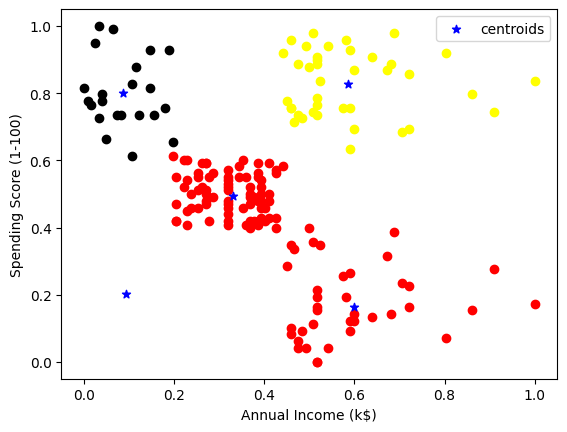

In [24]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color="black")
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color="red")
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color="yellow")
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color="red")
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color="gray")
plt.scatter(model1.cluster_centers_[:,0],model1.cluster_centers_[:,1],color="blue",marker="*",label="centroids")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()